Model Building

Team Id : PNT2022TMID18280

Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps
import numpy
from keras.datasets import mnist
from matplotlib import pyplot

Load the data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Analyse the data

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
X_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [6]:
y_train[2]

4

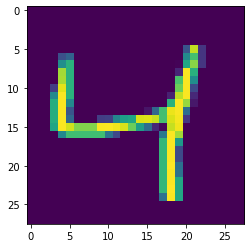

In [7]:
plt.imshow(X_train[2])

Data Preprocessing

In [8]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [9]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [10]:
Y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

Create the model

In [11]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

Compile the model

In [12]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

Train the model

In [13]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 109s 58ms/step - loss: 0.2591 - accuracy: 0.9469 - val_loss: 0.1248 - val_accuracy: 0.9634
Epoch 2/5
1875/1875 [==============================] - 110s 58ms/step - loss: 0.0742 - accuracy: 0.9776 - val_loss: 0.0905 - val_accuracy: 0.9710
Epoch 3/5
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0474 - accuracy: 0.9845 - val_loss: 0.0855 - val_accuracy: 0.9758
Epoch 4/5
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0354 - accuracy: 0.9889 - val_loss: 0.1053 - val_accuracy: 0.9752
Epoch 5/5
1875/1875 [==============================] - 106s 57ms/step - loss: 0.0281 - accuracy: 0.9915 - val_loss: 0.1086 - val_accuracy: 0.9748


Test the model

In [14]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.10855745524168015, 0.9747999906539917]


In [15]:
prediction = model.predict(X_test[:6])
print(prediction)

1/1 [==============================] - 0s 171ms/step
[[1.2065910e-12 2.9789200e-14 1.2585115e-10 3.1951169e-10 1.6641216e-13
  5.5336404e-15 1.4522152e-20 1.0000000e+00 6.7726891e-09 6.7247728e-11]
 [1.5630913e-10 6.5942291e-10 1.0000000e+00 1.0835551e-12 8.4899246e-18
  7.4968040e-15 3.7670805e-10 2.6124387e-17 5.5974499e-11 6.8737841e-16]
 [1.8611118e-11 9.9971217e-01 7.6117715e-07 1.5593489e-13 2.3420353e-05
  2.1031763e-05 3.6960767e-08 9.0830480e-07 2.4174295e-04 9.0317899e-11]
 [1.0000000e+00 1.6215061e-17 2.6772470e-11 9.5272995e-16 1.2091799e-13
  9.2005847e-11 3.8800091e-10 1.9468100e-13 6.7435030e-10 1.0371038e-08]
 [4.1015207e-15 8.1935254e-22 2.6625205e-18 1.8816403e-17 1.0000000e+00
  6.2975496e-22 2.3692977e-17 1.9842730e-16 5.7110148e-16 1.3463005e-13]
 [3.7441495e-12 9.9992251e-01 7.4991817e-08 7.0841596e-12 2.2382910e-07
  3.2214842e-08 3.1644652e-11 6.7527244e-06 7.0347895e-05 3.5291223e-09]]


In [16]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:6])

[7 2 1 0 4 1]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Save the model

In [17]:
model.save("Model.h5")